In [1]:
import tensorflow as tf

/Users/sungchullee/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/sungchullee/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/sungchullee/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/sungchullee/.local/lib/python3.7/site-packages/tensorflow/python/f

In [8]:
import numpy as np
a = np.array([[[1,2,3]]])
print(a)
print(a.shape) # 변수

a = {'one' : 1, 'two' : 2, 'three' : 3}
print(a.get('four', '해당 키가 없습니다. 확인요망!'))  # 함수 - 메쏘드

[[[1 2 3]]]
(1, 1, 3)
해당 키가 없습니다. 확인요망!


In [9]:
a, b = (1, 2) # unpacking
print(a, b)

1 2


In [10]:
a, b = (({1}, [1]), ({'one':1}, (1,))) # unpacking
print(a, b)

({1}, [1]) ({'one': 1}, (1,))


In [11]:
(a, b), (c, d) = (({1}, [1]), ({'one':1}, (1,))) # unpacking
print(a, b, c, d)

{1} [1] {'one': 1} (1,)


In [13]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [14]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [15]:
print(x_train.shape) # 60000장의 28-28 흙백사진
print(y_train.shape) # 60000개의 정답지
print(x_test.shape) # 10000장의 28-28 흙백사진
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [28]:
print(x_train[0,:,:].shape) # (28,28)
print(x_train[0,:,:].dtype) # uint8
print(y_train[0])

(28, 28)
uint8
5


In [19]:
2**8-1

255

In [34]:
a = 'Correct Answer : ' + str(y_train[0])    # string concatenation
a = 'Correct Answer : %d' % y_train[0]       # placeholder
a = 'Correct Answer : {}'.format(y_train[0]) # format string
a = f'Correct Answer : {y_train[0]}'         # f string
print(a)

Correct Answer : 5


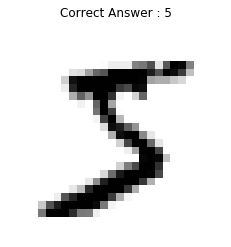

In [35]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='binary')
plt.title(f'Correct Answer : {y_train[0]}')
plt.axis('off')
plt.show()

In [4]:
print(x_train.dtype)
print(y_train.dtype)
print(x_test.dtype)
print(y_test.dtype)

uint8
uint8
uint8
uint8


<class 'numpy.ndarray'>
(2, 10)


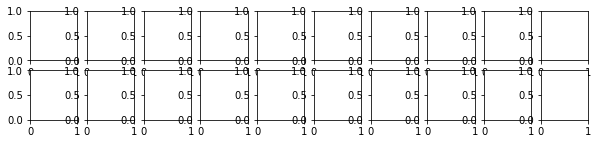

In [39]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(10,2))
print(type(axes))
print(axes.shape) 

In [ ]:
# plt.subplot  # matplab style
# title
#
# plt.subplots # oop style
# set_title

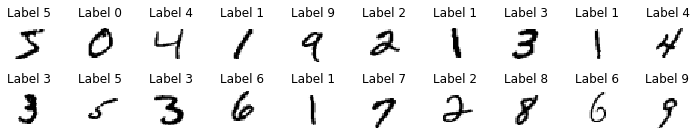

In [41]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(10,2))
for i in range(2):
    for j in range(10):
        axes[i, j].imshow(x_train[i*10+j], cmap='binary') 
        axes[i, j].set_title(f'Label {y_train[i*10+j]}')
        axes[i, j].axis('off')
plt.tight_layout()
plt.show()

In [45]:
import copy
a = [1,2,3]            # [1,2,3]
b = copy.copy(a)       # [1,2,3]
print(a)
print(b)
b[-1] = 300
print(a)
print(b)

[1, 2, 3]
[1, 2, 3]
[1, 2, 3]
[1, 2, 300]


In [47]:
import numpy as np
np.eye(10)[[3,3,7]]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [49]:
# data loading for logistic regression
import tensorflow as tf
import numpy as np
import copy
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train, x_test = x_train.reshape((-1, 784)), x_test.reshape((-1, 784))
x_train, x_test = x_train.astype(np.float32), x_test.astype(np.float32)
y_train_cls = copy.copy(y_train).astype(np.int32) # [3,4,5,] 
y_test_cls = copy.copy(y_test).astype(np.int32)
y_train = np.eye(10)[y_train].astype(np.float32)
y_test = np.eye(10)[y_test].astype(np.float32)
print(y_train_cls[0], y_train[0])

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [11]:
# data loading for CNN
import tensorflow as tf
import numpy as np
import copy
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train, x_test = x_train.reshape((-1, 28, 28, 1)), x_test.reshape((-1, 28, 28, 1))
x_train, x_test = x_train.astype(np.float32), x_test.astype(np.float32)
y_train_cls = copy.copy(y_train).astype(np.int64) 
y_test_cls = copy.copy(y_test).astype(np.int64)
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]
print(y_test_cls[0], y_test[0])

7 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
